In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn import datasets

Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.
Дополнительное задание(не обязательно): Получите такие же характеристики для линейной регрессии и сравните две модели.
Подробности в .ipynb файле

In [2]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    def _log_grad(self, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, self.w.T).flatten()+self.w0
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    def _optimize(self, X, target):
        for i in range(self.n_iterations):        
            grad_w, grad_w0 = self._log_grad(X, target)
            self.w = self.w-self.eta * grad_w
            self.w0 = self.w0 - self.eta * grad_w0
    def fit(self, X, target):
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        self._optimize(X, target)
    def predict_proba(self, X):  
        '''
        Рассчёт вероятности
        '''
        score=X.dot(self.w.T).flatten()+self.w0
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [3]:
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [4]:
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)

In [5]:
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)
X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [6]:
mod=logistic_regression()
mod.fit(X_train, y_train)
proba=np.unique(mod.predict_proba(X_test))

In [7]:
conf = []
FPR = []
TPR = []
precision = []
for p in proba:
    confusion_p = confusion(mod.predict(X_test, p), y_test)
    conf.append(confusion_p)
    FPR.append(confusion_p['FP'] / (confusion_p['FP'] + confusion_p['TN']))
    TPR.append(confusion_p['TP'] / (confusion_p['TP'] + confusion_p['FN']))
    precision.append(confusion_p['TP'] / (confusion_p['TP'] + confusion_p['FP']))
    print("Для порога по вероятности {0} на тестовой выборке имеем:".format(p)+
      f" {confusion_p}")
recall = TPR

Для порога по вероятности 0.37576183889983183 на тестовой выборке имеем: {'TP': 16, 'FP': 13, 'FN': 0, 'TN': 1}
Для порога по вероятности 0.37743531819847453 на тестовой выборке имеем: {'TP': 16, 'FP': 12, 'FN': 0, 'TN': 2}
Для порога по вероятности 0.38605073396047773 на тестовой выборке имеем: {'TP': 16, 'FP': 11, 'FN': 0, 'TN': 3}
Для порога по вероятности 0.3932982404221594 на тестовой выборке имеем: {'TP': 16, 'FP': 10, 'FN': 0, 'TN': 4}
Для порога по вероятности 0.3960311448763592 на тестовой выборке имеем: {'TP': 16, 'FP': 9, 'FN': 0, 'TN': 5}
Для порога по вероятности 0.4219700922749085 на тестовой выборке имеем: {'TP': 16, 'FP': 8, 'FN': 0, 'TN': 6}
Для порога по вероятности 0.4258110607284189 на тестовой выборке имеем: {'TP': 16, 'FP': 7, 'FN': 0, 'TN': 7}
Для порога по вероятности 0.4351868598210908 на тестовой выборке имеем: {'TP': 16, 'FP': 6, 'FN': 0, 'TN': 8}
Для порога по вероятности 0.43566683838569675 на тестовой выборке имеем: {'TP': 16, 'FP': 5, 'FN': 0, 'TN': 9}
Дл

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [8]:
precision.reverse()
FPR.append(1)
TPR.append(0)
FPR.reverse()
TPR.reverse()
precision = np.array(precision)
FPR = np.array(FPR)
TPR = np.array(TPR)
recall = TPR[1:]

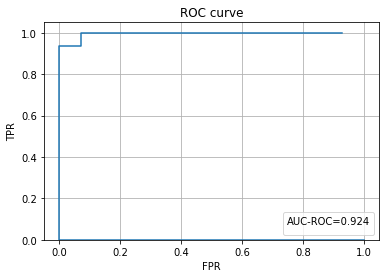

In [9]:
AUC_ROC = np.sum((FPR[1:]-FPR[:-1])*(TPR[1:]+TPR[:-1])/2)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR)

In [10]:
precision = precision[1:]

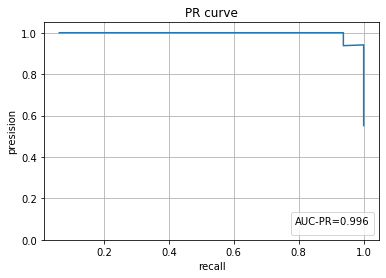

In [11]:
AUC_PR = np.sum(precision*(recall[1:]-recall[:-1]))

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall[1:], precision)